In [1]:
import matplotlib.pylab as plt
import numpy as np

\begin{eqnarray}
\vec{F}_B &=& q\vec{v} \times \vec{B} \\ 
\vec{F}_E &=& q\vec{E}
\end{eqnarray}

In [2]:
class particle:
    def __init__(self, x, v, a, mass=1,q=1):
        if type(x) != np.ndarray:
            print("x should be a numpy array!")
        self.x = x
        self.v = v
        self.a = a
        self.mass = mass
        self.q = q
        
    def update(self, dt, F=None):
        if F is not None:
            self.a = F/self.mass
        #self.v += dt*self.a
        #self.x += dt*self.v
        self.x += self.v*dt + (0.5*self.a*dt*dt)
        self.v += dt*self.a
        
        
        

In [3]:
def swim(p, t0=0, t1=10, dt=0.1, F=None):

    times=[]
    xpts=[]
    vpts=[]
    apts=[]
    
    t=t0
    while t<t1:
        times.append(t)
        p.update(dt,F)
        xpts.append(p.x.copy())
        vpts.append(p.v.copy())
        apts.append(p.a.copy())

        t += dt

    xpts = np.array(xpts)
    vpts = np.array(vpts)
    apts = np.array(apts)

    return times,xpts,vpts,apts

In [4]:
def mag(vec):
    if type(vec)==np.ndarray and type(vec[0])==float:
        return np.sqrt(vec[0]*vec[0] + vec[1]*vec[1] + vec[2]*vec[2])
    
    if type(vec)==np.ndarray and type(vec[0])==np.ndarray:
        m = []
        for v in vec:
            m.append(np.sqrt(v[0]*v[0] + v[1]*v[1] + v[2]*v[2]))
        m = np.array(m)
        return m

def plot_position_velocity_acceleration(times,xpts,vpts,apts):
    coordinates = ['x','y','z']

    for pts,label in zip([xpts,vpts, apts],['position','velocity','acceleration']):

        plt.figure(figsize=(12,3))
        for i in range(0,3):
            plt.subplot(1,3,i+1)
            plt.plot(times, pts.T[i])
            plt.xlabel('Time')
            text = '{0} {1}'.format(coordinates[i],label)
            plt.ylabel(text)

        plt.tight_layout()

    for pts,label in zip([xpts,vpts, apts],['position','velocity','acceleration']):

        plt.figure(figsize=(12,3))
        for i in range(0,3):
            plt.subplot(1,3,i+1)
            idx0 = i
            idx1 = (i+1)%3
            plt.plot(pts.T[idx0], pts.T[idx1])
            text = '{0} {1}'.format(coordinates[idx0],label)
            plt.xlabel(text)
            text = '{0} {1}'.format(coordinates[idx1],label)
            plt.ylabel(text)

        plt.tight_layout()


    plt.figure(figsize=(12,3))
    i=0
    for pts,label in zip([xpts,vpts, apts],['position','velocity','acceleration']):

        plt.subplot(1,3,i+1)
        plt.plot(times, mag(pts))
        plt.xlabel('Time')
        text = 'Magnitude of {0}'.format(label)
        plt.ylabel(text)
        i+=1

    plt.tight_layout()

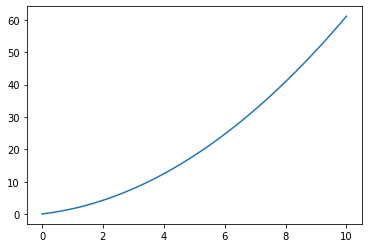

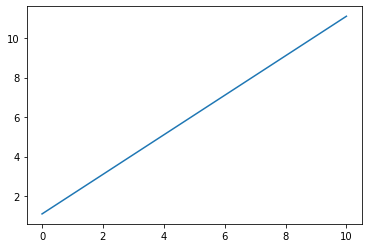

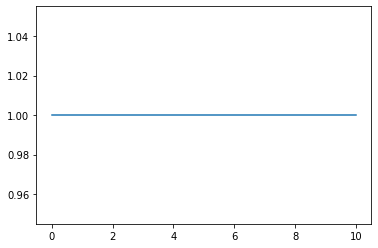

In [5]:
x = np.array([0.,0.,0.])
v = np.array([1.,0.,0.])
a = np.array([0.,0.,0.])
p = particle(x,v,a)

times,xpts,vpts,apts = swim(p, t0=0, t1=10., dt=0.1, F=np.array([1,1,1]))

plt.figure()
plt.plot(times, xpts.T[0])

plt.figure()
plt.plot(times, vpts.T[0])

plt.figure()
plt.plot(times, apts.T[0])

In [6]:
def swim_through_B_and_E_field(p, t0=0, t1=10, dt=0.1, B=None, E=None):

    times=[]
    xpts=[]
    vpts=[]
    apts=[]
    
    t=t0
    while t<t1:
        times.append(t)
        
        F = np.array([0., 0., 0.])

        # Magnetic field
        if type(B) is np.ndarray:
            F = p.q * np.cross(p.v,B)
        elif str(type(B)) == "<class 'function'>":
            F = p.q * np.cross(p.v,B(p.x))

            
        # Electric field
        if type(E) is np.ndarray:
            F += p.q * E
        elif str(type(E)) == "<class 'function'>":
            F += p.q * E(p.x)
 
            
                    
        p.update(dt,F)
        xpts.append(p.x.copy())
        vpts.append(p.v.copy())
        apts.append(p.a.copy())

        t += dt

    xpts = np.array(xpts)
    vpts = np.array(vpts)
    apts = np.array(apts)

    return times,xpts,vpts,apts

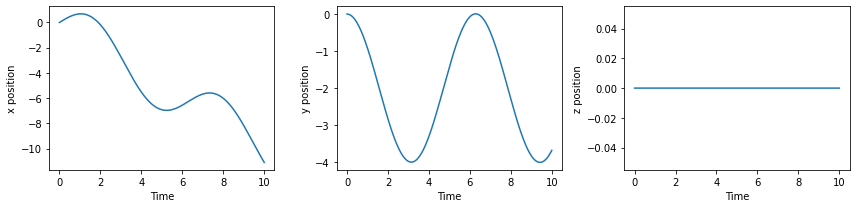

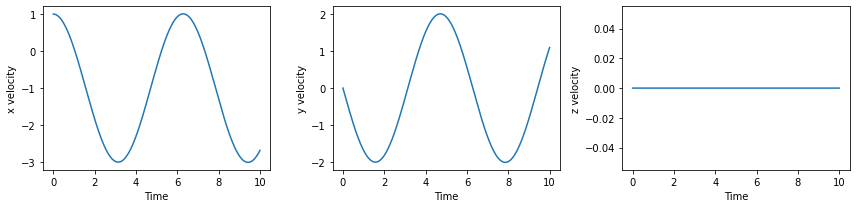

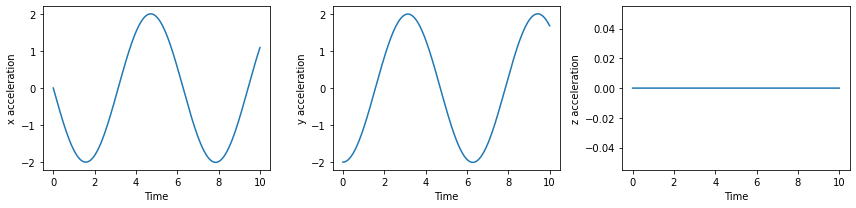

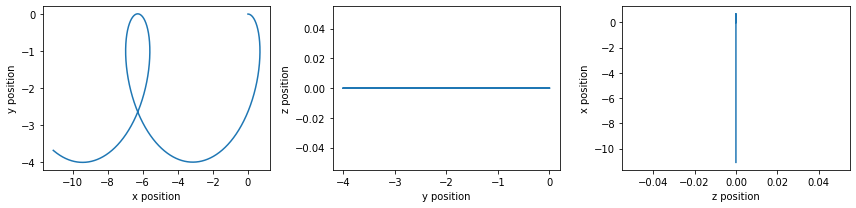

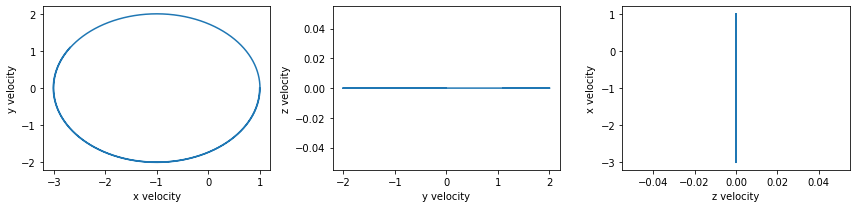

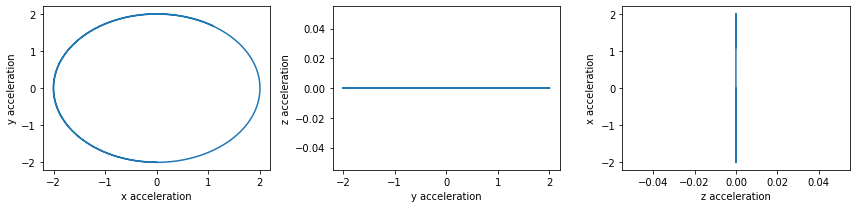

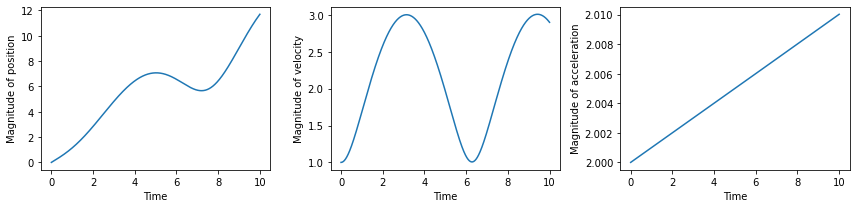

In [7]:
x = np.array([0.,0.,0.])
v = np.array([1.,0.,0.])
a = np.array([0.,0.,0.])
p = particle(x,v,a)

times,xpts,vpts,apts = swim_through_B_and_E_field(p, t0=0, t1=10., dt=0.001, B=np.array([0,0,1]), E=np.array([0,-1,0]))

plot_position_velocity_acceleration(times,xpts,vpts,apts)


In [8]:
def draw_B_field(region,B):
    Bmag = mag(B)
    
    x0 = region[0]
    y0 = region[1]

    x1 = region[2]
    y1 = region[3]

    xpts = []
    ypts = []
    for x in np.linspace(x0,x1,10):
        for y in np.linspace(y0,y1,10):
            xpts.append(x)
            ypts.append(y)
            
    return xpts,ypts

(0.0, 7.0)

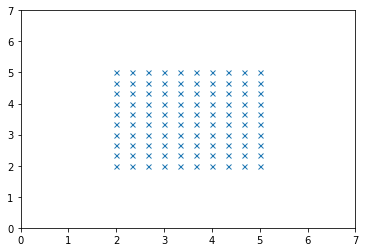

In [9]:
Bxpts, Bypts = draw_B_field([2,2,5,5], np.array([0,1,1]))

plt.figure()
plt.plot(Bxpts,Bypts,'x',markersize=5)
plt.xlim(0,7)
plt.ylim(0,7)

In [10]:
def Bfield(x):
    xmin = 2
    xmax = 5
    ymin = 0
    ymax = 5
    
    B = np.array([0., 0., 0.])    
    if x[0]>=xmin and x[0]<xmax and \
       x[1]>=ymin and x[1]<ymax:
        B = np.array([0., 0., -1.])
        
    return B

def Efield(x):
    xmin = 0
    xmax = 2
    ymin = 0
    ymax = 5
    
    E = np.array([0., 0., 0.])
    if x[0]>=xmin and x[0]<xmax and \
       x[1]>=ymin and x[1]<ymax:
        E = np.array([1., 0., 0.])
        
    return E

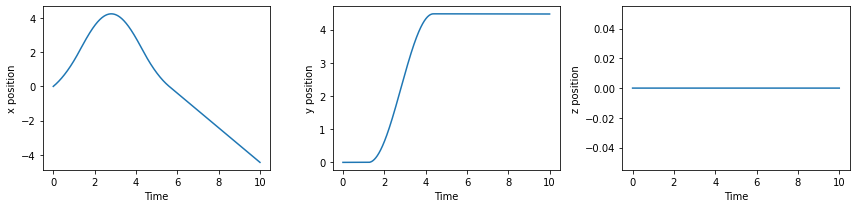

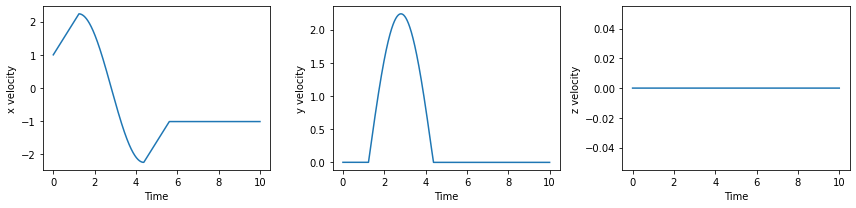

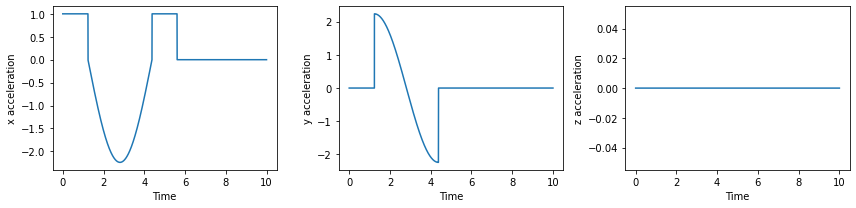

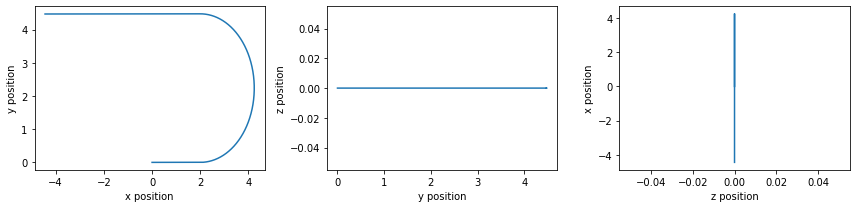

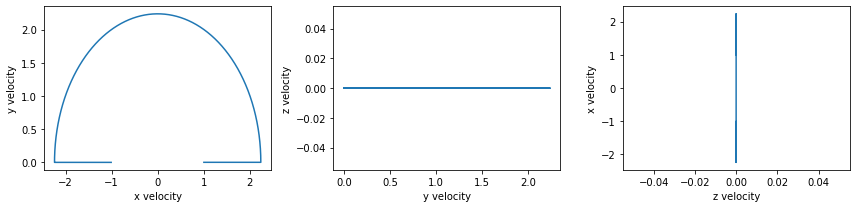

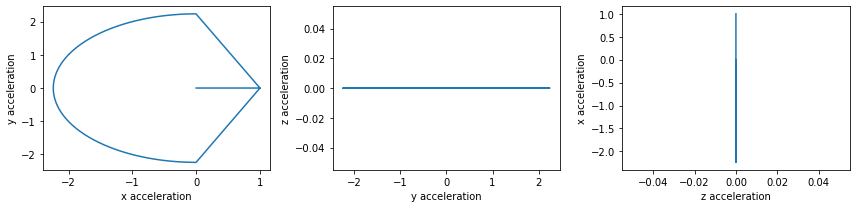

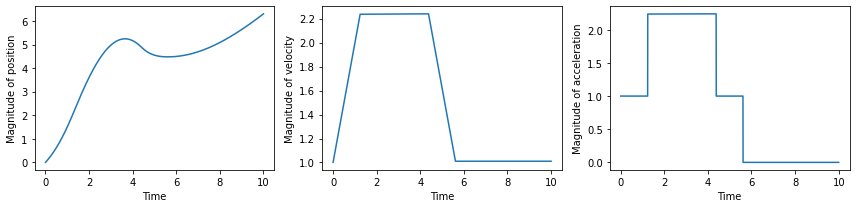

In [11]:
x = np.array([0.,0.,0.])
v = np.array([1.,0.,0.])
a = np.array([0.,0.,0.])
p = particle(x,v,a)

#times,xpts,vpts,apts = swim_through_B_and_E_field(p, t0=0, t1=10., dt=0.001, B=Bfield, E=np.array([0,-1,0]))
times,xpts,vpts,apts = swim_through_B_and_E_field(p, t0=0, t1=10., dt=0.001, B=Bfield, E=Efield)



plot_position_velocity_acceleration(times,xpts,vpts,apts)